In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)

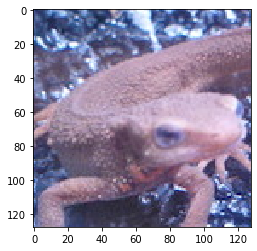

In [2]:
# Original image
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Task 11: Smoothing Filter

In [3]:
def smoothing_filter(img, size):
    height, width, channel = img.shape
    out = img.copy()
    
    pad = size // 2
    out = np.pad(out, [(pad, pad), (pad, pad), (0, 0)], "constant", constant_values=(0, 0))
    
    tmp = out.copy()
    
    for h in range(height):
        for w in range(width):
            for c in range(channel):
                out[h+pad, w+pad, c] = np.average(tmp[h:h+size, w:w+size, c])
    
    out = out[pad:height, pad:width, :].astype(np.uint8)
    
    return out

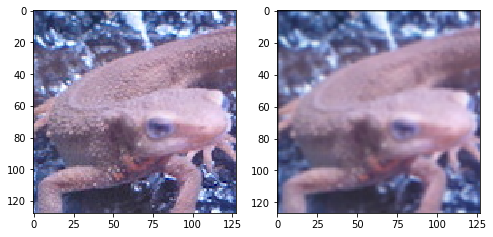

In [4]:
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(smoothing_filter(img, 3))

In [5]:
def filter2D(img, size, kernel):
    height, width, channel = img.shape
    out = img.copy()
    
    pad = size // 2
    out = np.pad(out, [(pad, pad), (pad, pad), (0, 0)], "constant", constant_values=(0, 0))
    
    tmp = out.copy()
    
    for h in range(height):
        for w in range(width):
            for c in range(channel):
                out[h+pad, w+pad, c] = np.sum(tmp[h:h+size, w:w+size, c] * kernel)
    
    out = out[pad:height, pad:width, :].astype(np.uint8)
    
    return out

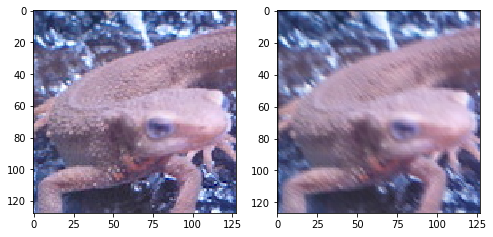

In [6]:
motion_kernel = np.array([
    [1/3, 0, 0],
    [0, 1/3, 0],
    [0, 0, 1/3]
]).astype(np.float32)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(filter2D(img, 3, motion_kernel))